In [144]:
# User input

# Experimental values for input
# n=2.46
# n2=1.25*10^-18 m^2/V^2
# wavelength=1.53um
# slab thickness = wavelength
# input amplitude a=1.927*10^8 V/m

sz = 10          # size of cell in z direction
amp = 0.5*10**3*1.5417      # amplitude of source
dpml = 1        # PML thickness
k = 4.1*10**-3        # Kerr susceptibility
n=2.46         # index
time_set=10000         # simulation run time
resolution = 90

#----Continuous Source
frq_cs=1/1.53          # meep frequency
cs_width=100          #the inverse of the exponential rate at which the current turns off and on

# frequency range for monitors
nfreq = 1
fmin = 1/1.53
fmax = 1/1.53

# Geometry
d_s=1.53# slab thickness
pos_s=0# slab position

-----------
Initializing structure...
time for choose_chunkdivision = 5.79357e-05 s
Working in 1D dimensions.
Computational cell is 0 x 0 x 10 with resolution 90
time for set_epsilon = 0.000247955 s
-----------


FloatProgress(value=0.0, description='0% done ', max=10000.0)

Meep progress: 374.5/10000.0 = 3.7% done in 4.0s, 102.8s to go
on time step 67495 (time=374.972), 5.92663e-05 s/step
Meep progress: 752.3666666666667/10000.0 = 7.5% done in 8.0s, 98.3s to go
on time step 135520 (time=752.889), 5.88021e-05 s/step
Meep progress: 1109.911111111111/10000.0 = 11.1% done in 12.0s, 96.1s to go
on time step 199879 (time=1110.44), 6.21521e-05 s/step
Meep progress: 1477.7944444444445/10000.0 = 14.8% done in 16.0s, 92.3s to go
on time step 266116 (time=1478.42), 6.03902e-05 s/step
Meep progress: 1856.4111111111113/10000.0 = 18.6% done in 20.0s, 87.7s to go
on time step 334276 (time=1857.09), 5.86862e-05 s/step
Meep progress: 2233.9055555555556/10000.0 = 22.3% done in 24.0s, 83.4s to go
on time step 402235 (time=2234.64), 5.88592e-05 s/step
Meep progress: 2613.061111111111/10000.0 = 26.1% done in 28.0s, 79.2s to go
on time step 470486 (time=2613.81), 5.86087e-05 s/step
Meep progress: 2972.338888888889/10000.0 = 29.7% done in 32.0s, 75.7s to go
on time step 535170 

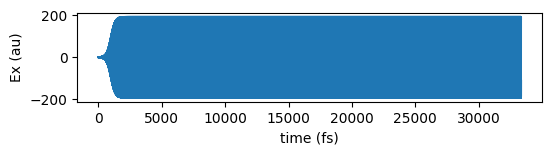

In [145]:
# Reference simulation (source only)

import meep as mp
import numpy as np
import matplotlib.pyplot as plt

geometry = [mp.Block(center=mp.Vector3(0,0,pos_s),size=mp.Vector3(0,0,d_s), material=mp.Medium(index=n, chi3=[] ))]
geometry2 = [mp.Block(center=mp.Vector3(0,0,pos_s),size=mp.Vector3(0,0,d_s), material=mp.Medium(index=n, chi3=k ))]

dimensions = 1
cell = mp.Vector3(0, 0, sz)
pml_layers = mp.PML(dpml)
default_material = mp.Medium(index=1, chi3=[])

sources = mp.Source(mp.ContinuousSource(frq_cs, width=cs_width), component=mp.Ex,
					center=mp.Vector3(0, 0, -0.5*sz + dpml), amplitude=amp)

sim = mp.Simulation(cell_size=cell,
					geometry=[],
					sources=[sources],
					boundary_layers=[pml_layers],
					default_material=default_material,
					resolution=resolution,
					dimensions=dimensions)

trans_ref = sim.add_flux(0.5 * (fmin + fmax), fmax - fmin, nfreq,
						mp.FluxRegion(mp.Vector3(0, 0, 0.5*sz - dpml - 4)))
refl_ref = sim.add_flux(0.5 * (fmin + fmax), fmax - fmin, nfreq,
						mp.FluxRegion(mp.Vector3(0, 0, 0.5*sz - dpml - 4)))

#         Define E field monitor
dx=1/resolution
dt=0.5*dx
tm_val_x=[]
def get_dot(sim):	
	tm_val_x.append(sim.get_array(size=mp.Vector3(), center=mp.Vector3(0,0,-0.5*sz + dpml), component=mp.Ex))
#        #        #        #    

sim.run(mp.at_every(dt,get_dot),until=time_set)


#         plot results
tm_val_x=np.array(tm_val_x)
max_ind=np.size(tm_val_x)
c=3*10**8 # m/s speed of light
mon_t=[]
for n in np.arange(0,max_ind,1):
	mon_tmp=(dt+dt*n)*(10**-6/c)*10**15 # s
	mon_t.append(mon_tmp)

figure2=plt.figure(dpi=100)
ax1=plt.subplot(3, 1, 1)
plt.plot(mon_t,tm_val_x)
plt.xlabel('time (fs)')
plt.ylabel('Ex (au)') 

#         Save reference data
freqs_ref = mp.get_flux_freqs(trans_ref)
plt_range_ref=1/np.asarray(freqs_ref)
box_x1_trans_ref = mp.get_fluxes(trans_ref)
flux_ref=np.asarray(box_x1_trans_ref)

#         Print amplitude and intensity of field
print("E_0=",np.amax(tm_val_x),"V/um")
print("E_0=",np.amax(tm_val_x)/(10**-6),"V/m")
print("I=",np.amax(np.abs(tm_val_x))**2/(2*120*np.pi),"W/um^2")

-----------
Initializing structure...
time for choose_chunkdivision = 5.60284e-05 s
Working in 1D dimensions.
Computational cell is 0 x 0 x 10 with resolution 90
     block, center = (0,0,0)
          size (0,0,1.53)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (6.0516,6.0516,6.0516)
time for set_epsilon = 0.000262022 s
-----------


FloatProgress(value=0.0, description='0% done ', max=10000.0)

Meep progress: 377.9277777777778/10000.0 = 3.8% done in 4.0s, 101.8s to go
on time step 68110 (time=378.389), 5.87293e-05 s/step
Meep progress: 734.6/10000.0 = 7.3% done in 8.0s, 100.9s to go
on time step 132315 (time=735.083), 6.23007e-05 s/step
Meep progress: 1091.611111111111/10000.0 = 10.9% done in 12.0s, 97.9s to go
on time step 196587 (time=1092.15), 6.2236e-05 s/step
Meep progress: 1458.5111111111112/10000.0 = 14.6% done in 16.0s, 93.7s to go
on time step 262633 (time=1459.07), 6.05639e-05 s/step
Meep progress: 1838.5222222222224/10000.0 = 18.4% done in 20.0s, 88.8s to go
on time step 331048 (time=1839.16), 5.84671e-05 s/step
Meep progress: 2219.0/10000.0 = 22.2% done in 24.0s, 84.2s to go
on time step 399539 (time=2219.66), 5.8402e-05 s/step
Meep progress: 2575.016666666667/10000.0 = 25.8% done in 28.0s, 80.7s to go
on time step 463634 (time=2575.74), 6.24081e-05 s/step
Meep progress: 2947.0111111111114/10000.0 = 29.5% done in 32.0s, 76.6s to go
on time step 530595 (time=2947.7

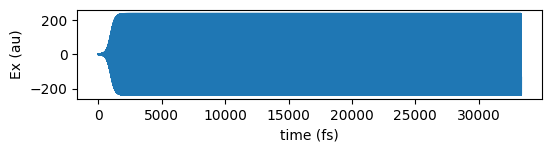

In [146]:
# 1d simulation of a plane wave propagating through a linear slab
sim.reset_meep()

sim = mp.Simulation(cell_size=cell,
					geometry=geometry,
					sources=[sources],
					boundary_layers=[pml_layers],
					default_material=default_material,
					resolution=resolution,
					dimensions=dimensions)

trans = sim.add_flux(0.5 * (fmin + fmax), fmax - fmin, nfreq,
						mp.FluxRegion(mp.Vector3(0, 0, 0.5*sz - dpml - 4)))
refl = sim.add_flux(0.5 * (fmin + fmax), fmax - fmin, nfreq,
						mp.FluxRegion(mp.Vector3(0, 0, -0.5*sz + dpml + 4)))

tm_val_x=[]
sim.run(mp.at_every(dt,get_dot),until=time_set)


#         plot results
freqs_lin = mp.get_flux_freqs(trans)
plt_range_lin=1/np.asarray(freqs_lin)
box_x1_trans_lin = mp.get_fluxes(trans)
flux_lin=np.asarray(box_x1_trans_lin)
box_x1_refl_lin = mp.get_fluxes(refl)
flux_refl_lin=np.asarray(box_x1_refl_lin)

tm_val_x=np.array(tm_val_x)
max_ind=np.size(tm_val_x)
c=3*10**8 # m/s speed of light
mon_t=[]
for n in np.arange(0,max_ind,1):
	mon_tmp=(dt+dt*n)*(10**-6/c)*10**15 # s
	mon_t.append(mon_tmp)

figure2=plt.figure(dpi=100)
ax1=plt.subplot(3, 1, 1)
plt.plot(mon_t,tm_val_x)
plt.xlabel('time (fs)')
plt.ylabel('Ex (au)') 

#         Print amplitude and intensity of field
print("E_0=",np.amax(tm_val_x),"V/um")
print("E_0=",np.amax(tm_val_x)/(10**-6),"V/m")
print("I=",np.amax(np.abs(tm_val_x))**2/(2*120*np.pi),"W/um^2")

-----------
Initializing structure...
time for choose_chunkdivision = 6.10352e-05 s
Working in 1D dimensions.
Computational cell is 0 x 0 x 10 with resolution 90
     block, center = (0,0,0)
          size (0,0,1.53)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (6.0516,6.0516,6.0516)
time for set_epsilon = 0.00026083 s
-----------


FloatProgress(value=0.0, description='0% done ', max=10000.0)

Meep progress: 369.6777777777778/10000.0 = 3.7% done in 4.0s, 104.2s to go
on time step 66617 (time=370.094), 6.00454e-05 s/step
Meep progress: 737.3111111111111/10000.0 = 7.4% done in 8.0s, 100.5s to go
on time step 132800 (time=737.778), 6.04424e-05 s/step
Meep progress: 1092.0166666666667/10000.0 = 10.9% done in 12.0s, 97.9s to go
on time step 196654 (time=1092.52), 6.26433e-05 s/step
Meep progress: 1458.6055555555556/10000.0 = 14.6% done in 16.0s, 93.7s to go
on time step 262646 (time=1459.14), 6.06135e-05 s/step
Meep progress: 1837.4944444444445/10000.0 = 18.4% done in 20.0s, 88.8s to go
on time step 330861 (time=1838.12), 5.86383e-05 s/step
Meep progress: 2215.777777777778/10000.0 = 22.2% done in 24.0s, 84.3s to go
on time step 398955 (time=2216.42), 5.87428e-05 s/step
Meep progress: 2571.9500000000003/10000.0 = 25.7% done in 28.0s, 80.9s to go
on time step 463072 (time=2572.62), 6.23865e-05 s/step
Meep progress: 2940.8055555555557/10000.0 = 29.4% done in 32.0s, 76.8s to go
on ti

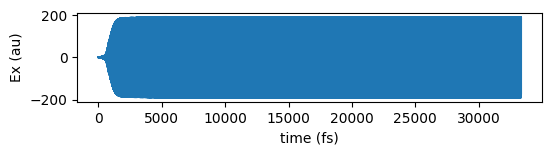

In [147]:
# 1d simulation of a plane wave propagating through a Kerr medium
sim.reset_meep()


#geometry = [mp.Block(center=mp.Vector3(0,0,(sz-dpml)/4),size=mp.Vector3(0,0,(sz-dpml)/2), material=mp.Medium(index=n, chi3=k ))]

sim = mp.Simulation(cell_size=cell,
					geometry=geometry2,
					sources=[sources],
					boundary_layers=[pml_layers],
					default_material=default_material,
					resolution=resolution,
					dimensions=dimensions)

trans = sim.add_flux(0.5 * (fmin + fmax), fmax - fmin, nfreq,
						mp.FluxRegion(mp.Vector3(0, 0, 0.5*sz - dpml - 4)))
refl = sim.add_flux(0.5 * (fmin + fmax), fmax - fmin, nfreq,
						mp.FluxRegion(mp.Vector3(0, 0, -0.5*sz + dpml + 4)))

tm_val_x=[]
sim.run(mp.at_every(dt,get_dot),until=time_set)

#         plot results
tm_val_x=np.array(tm_val_x)
max_ind=np.size(tm_val_x)
c=3*10**8 # m/s speed of light
mon_t=[]
for n in np.arange(0,max_ind,1):
	mon_tmp=(dt+dt*n)*(10**-6/c)*10**15 # s
	mon_t.append(mon_tmp)

figure2=plt.figure(dpi=100)
ax1=plt.subplot(3, 1, 1)
plt.plot(mon_t,tm_val_x)
plt.xlabel('time (fs)')
plt.ylabel('Ex (au)') 

#         Print amplitude and intensity of field
print("E_0=",np.amax(tm_val_x),"V/um")
print("E_0=",np.amax(tm_val_x)/(10**-6),"V/m")
print("I=",np.amax(np.abs(tm_val_x))**2/(2*120*np.pi),"W/um^2")

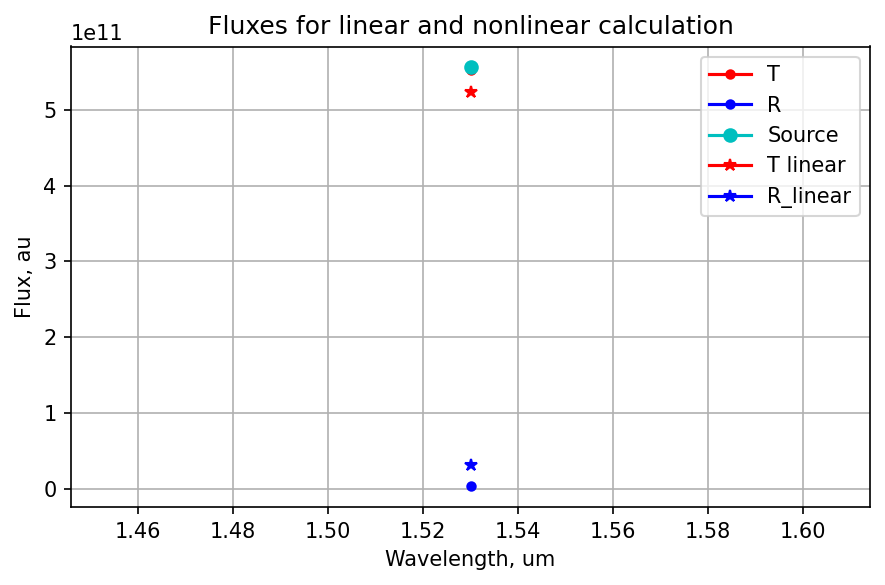

In [148]:
#         plot fluxes
freqs = mp.get_flux_freqs(trans)
plt_range=1/np.asarray(freqs)
box_x1_trans = mp.get_fluxes(trans)
flux=np.asarray(box_x1_trans)
box_x1_refl = mp.get_fluxes(refl)
flux_refl=np.asarray(box_x1_refl)
plt.figure(dpi=150)
plt.plot(plt_range_ref,flux,'ro-',label='T',markersize=4)
plt.plot(plt_range_ref,-flux_refl+flux_ref,'bo-',label='R',markersize=4)
plt.plot(plt_range_ref,flux_ref,'co-',label='Source')
plt.plot(plt_range_ref,flux_lin,'r*-',label='T linear')
plt.plot(plt_range_ref,-flux_refl_lin+flux_ref,'b*-',label='R_linear')
plt.grid(True,which="both",ls="-")
plt.xlabel('Wavelength, um')
plt.ylabel('Flux, au')
plt.legend(loc='upper right')
plt.title('Fluxes for linear and nonlinear calculation')
plt.tight_layout()

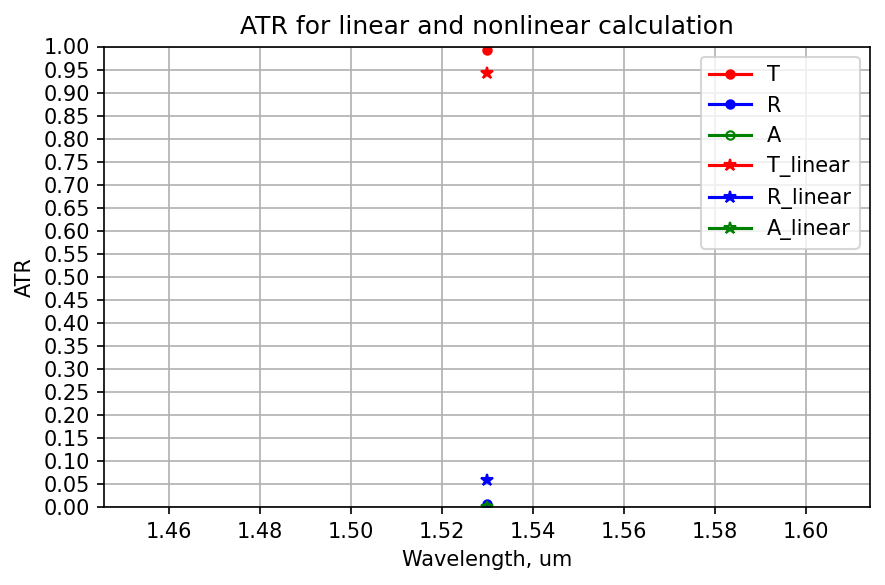

In [149]:
#         plot ATR
plt.figure(dpi=150)
plt.plot(plt_range_ref,flux/flux_ref,'ro-',label='T',markersize=4)
plt.plot(plt_range_ref,(-flux_refl+flux_ref)/flux_ref,'bo-',label='R',markersize=4)
plt.plot(plt_range_ref,1-(-flux_refl+flux_ref)/flux_ref-flux/flux_ref,'go-',label='A',markersize=4, markerfacecolor='none')
plt.plot(plt_range_ref,flux_lin/flux_ref,'r*-',label='T_linear')
plt.plot(plt_range_ref,(-flux_refl_lin+flux_ref)/flux_ref,'b*-',label='R_linear')
plt.plot(plt_range_ref,1-(-flux_refl_lin+flux_ref)/flux_ref-flux_lin/flux_ref,'g*-',label='A_linear', markerfacecolor='none')
plt.grid(True,which="both",ls="-")
plt.yticks([-0.05,0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95, 1])
plt.xlabel('Wavelength, um')
plt.ylabel('ATR')
plt.legend(loc='upper right')
#plt.xlim([0.85, 5])
plt.ylim([-0, 1])
plt.title('ATR for linear and nonlinear calculation')
plt.tight_layout()
np.savetxt('ATR.txt', (plt_range_ref,flux/flux_ref,1-flux_refl/flux_ref,1-(1-flux_refl/flux_ref)-flux/flux_ref), delimiter=',')